## CNN model

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random
import cv2
import os
import PIL
from PIL import Image

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow.keras
import tensorflow as tf



from keras.utils.vis_utils import model_to_dot

### **Storing the path of data into variables**

In [2]:
train_dir = r'data/train'  # Location of training images
validation_dir = r'data/valid' #Location of test images
test_dir =r'data/test' #Location of test images

In [3]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    )
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 7374 images belonging to 4 classes.
Found 1483 images belonging to 4 classes.


### **PLOTTING TRAIN IMAGES WITH THEIR LABELS**

In [4]:
def plots(ims, figsize=(16,16), rows=4, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        sp.set_title(class_names[titles[i].tolist().index(1)], fontsize=16)
        plt.imshow(ims[i])

In [5]:
class_names = ['T','K','D','I'] 

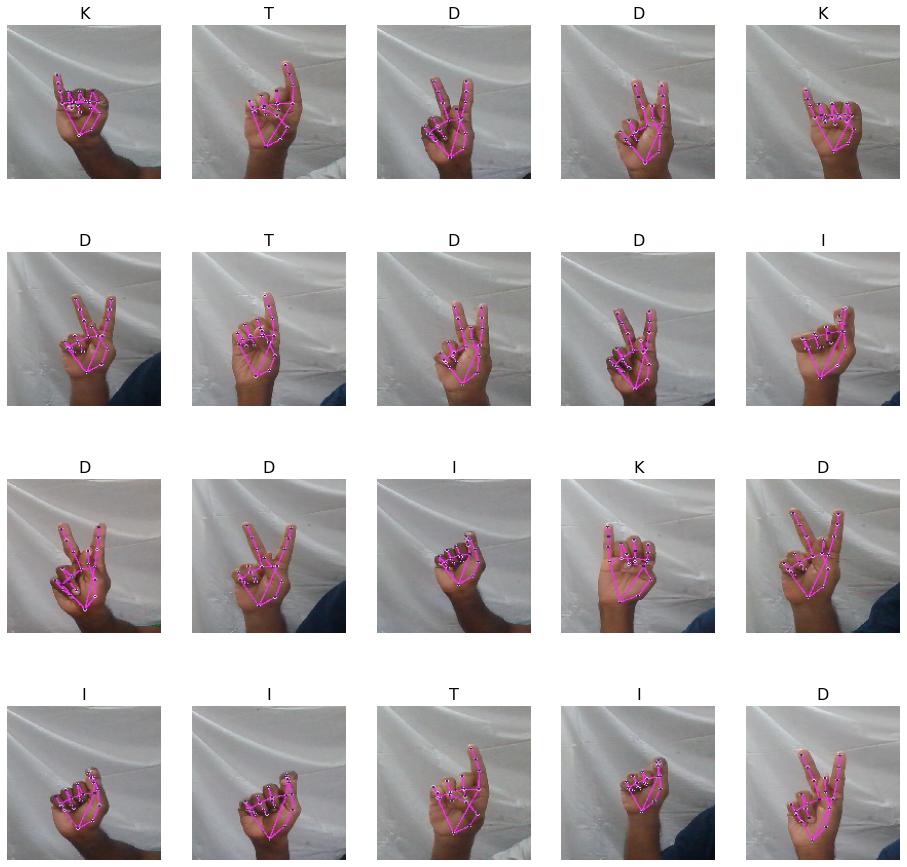

In [6]:
imgs, labels = next(train_generator)
plots(imgs, titles=labels)
plt.savefig('train_images.png')

## **CNN MODEL ARCHITECTURE**

In [7]:
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(4, activation='softmax'))

In [8]:
#Plotting a graphical representation of the model




In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2

In [10]:
from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']  
)

## **TRAINING**

In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=50, 
      epochs=5,
      validation_data=val_generator,
      validation_steps=33)  

Epoch 1/5
50/50 [==============================] - 26s 498ms/step - loss: 1.4782 - accuracy: 0.4960 - val_loss: 0.4433 - val_accuracy: 0.8773
Epoch 2/5
50/50 [==============================] - 28s 544ms/step - loss: 0.2622 - accuracy: 0.9270 - val_loss: 0.0867 - val_accuracy: 0.9727
Epoch 3/5
50/50 [==============================] - 51s 1s/step - loss: 0.1239 - accuracy: 0.9650 - val_loss: 0.0529 - val_accuracy: 0.9773
Epoch 4/5
50/50 [==============================] - 42s 856ms/step - loss: 0.0631 - accuracy: 0.9819 - val_loss: 0.0411 - val_accuracy: 0.9879
Epoch 5/5
50/50 [==============================] - 49s 983ms/step - loss: 0.0665 - accuracy: 0.9700 - val_loss: 0.0471 - val_accuracy: 0.9833


In [12]:
model.save("tkdi.h5") 

### **LOADING THE MODEL**

In [13]:
model = tf.keras.models.load_model('tkdi.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2

## **TESTING**

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 1483 images belonging to 4 classes.


In [15]:
model.evaluate(test_generator, steps=9)

9/9 [==============================] - 7s 641ms/step - loss: 0.0652 - accuracy: 0.9778


[0.06520656496286392, 0.9777777791023254]

In [16]:
Y_pred = model.predict_generator(test_generator, steps=8741 )
y_pred = np.argmax(Y_pred, axis=1)

C:\Users\jerry\anaconda3\envs\miniproject2\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


### **VISULAIZING THE PREDICTION OF THE MODEL ON TESTING DATA**

In [17]:
def labeles(l):
    for i in range(len(l)):
        if l[i] == 1:
            return class_names[i]

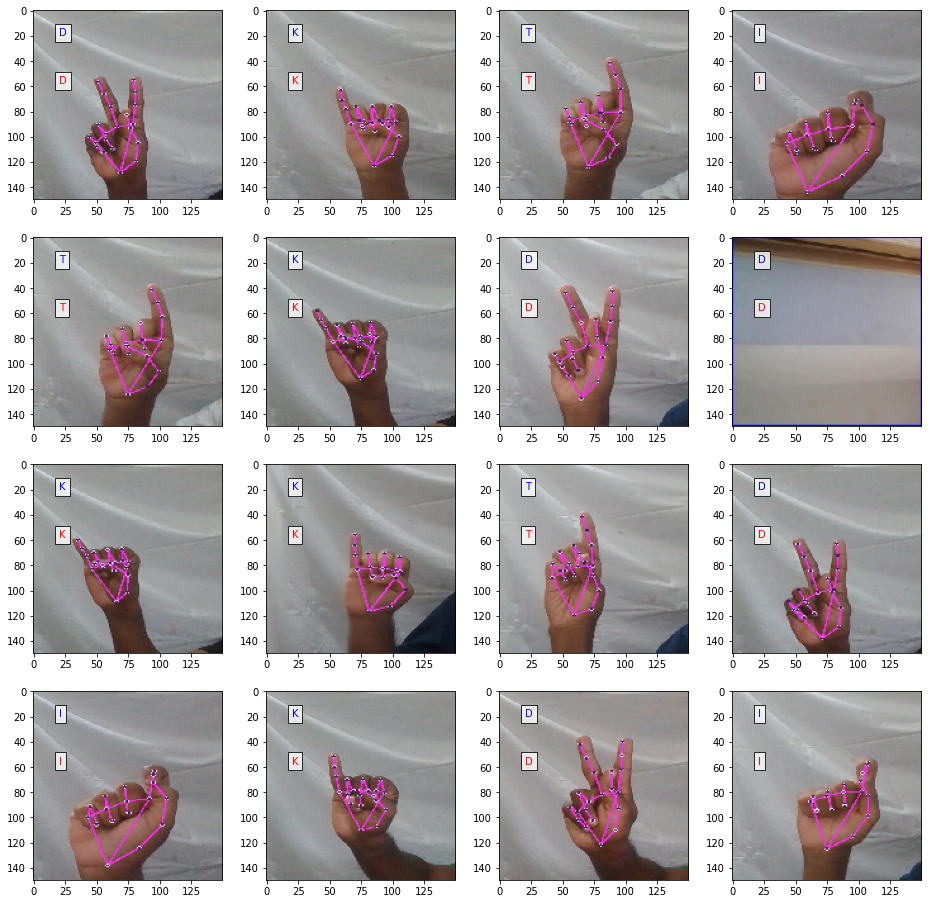

In [18]:
imgs, labels = next(test_generator)
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t= np.expand_dims(imgs[i], axis=0)
    prediction = model.predict(img_t) 
    idx = prediction[0].tolist().index(max(prediction[0]))
    
    plt.text(20, 58,class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    #actual
    plt.text(20, 20,labeles(labels[i]),color='blue',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])
plt.savefig('model_pred.png')